# ELECTRIC VEHICLE DATASET PREDICTION USING MACHINE LEARNING

Develop a predictive model to estimate the 2020 Census Tract of electric vehicles based on various attributes such as Make, Model Year, Electric Range, and other relevant features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
dataset=pd.read_csv('electronic_vehicle_dataset.csv')

In [3]:
dataset

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4RJXN66R,Snohomish,Everett,WA,98204.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,21.0,261311557,POINT (-122.2507211 47.8976713),PUGET SOUND ENERGY INC,5.306104e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,11.0,210641315,POINT (-122.1476337 47.4438471),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EA3L,King,Seattle,WA,98125.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,46.0,124517347,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1G1RC6S5XH,Kitsap,Port Orchard,WA,98367.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53,0,26.0,7832933,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09P,Snohomish,Monroe,WA,98272.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,39.0,235249262,POINT (-121.968385 47.854897),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,7SAYGDEE8P,King,Federal Way,WA,98023.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,30.0,253428738,POINT (-122.3581348 47.3097552),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
995,5YJ3E1EC2L,Kitsap,Bainbridge Island,WA,98110.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,23.0,103460479,POINT (-122.5305071 47.6400595),PUGET SOUND ENERGY INC,5.303509e+10
996,5YJ3E1EB3K,King,Seattle,WA,98177.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,32.0,332349776,POINT (-122.3691687 47.7403542),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
997,1N4BZ0CP2G,King,Shoreline,WA,98133.0,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,32.0,113112464,POINT (-122.342434 47.736655),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         999 non-null    object 
 1   County                                             998 non-null    object 
 2   City                                               998 non-null    object 
 3   State                                              999 non-null    object 
 4   Postal Code                                        998 non-null    float64
 5   Model Year                                         999 non-null    int64  
 6   Make                                               999 non-null    object 
 7   Model                                              999 non-null    object 
 8   Electric Vehicle Type                              999 non-null    object 
 9   Clean Alte

In [5]:
dataset.isnull().sum()

VIN (1-10)                                           0
County                                               1
City                                                 1
State                                                0
Postal Code                                          1
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 1
DOL Vehicle ID                                       0
Vehicle Location                                     1
Electric Utility                                     1
2020 Census Tract                                    1
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
cat_imputer=SimpleImputer(strategy='most_frequent')
num_imputer=SimpleImputer(strategy='mean')

In [8]:
cat_data=['County','City','Vehicle Location','Electric Utility']
num_data=['Postal Code','Legislative District','2020 Census Tract']

In [9]:
dataset[cat_data]=cat_imputer.fit_transform(dataset[cat_data])
dataset[num_data]=num_imputer.fit_transform(dataset[num_data])

In [10]:
dataset.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [11]:
dataset['State'].nunique()

2

In [12]:
dataset['Make'].nunique()

30

In [13]:
dataset['Model'].nunique()

89

Text(0.5, 0.98, 'Frequency Distribution of Make')

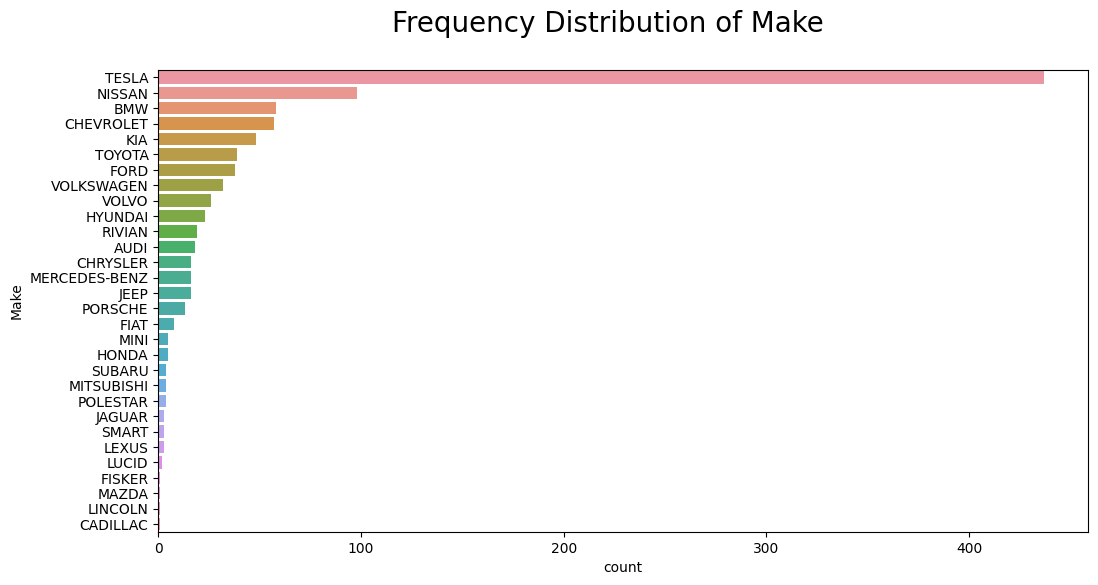

In [14]:
# Frequency distribution of the 'Make' column
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, y='Make', order=dataset['Make'].value_counts().index)
plt.suptitle('Frequency Distribution of Make',fontsize=20)

Text(0.5, 0.98, 'Distribution of Electric Range')

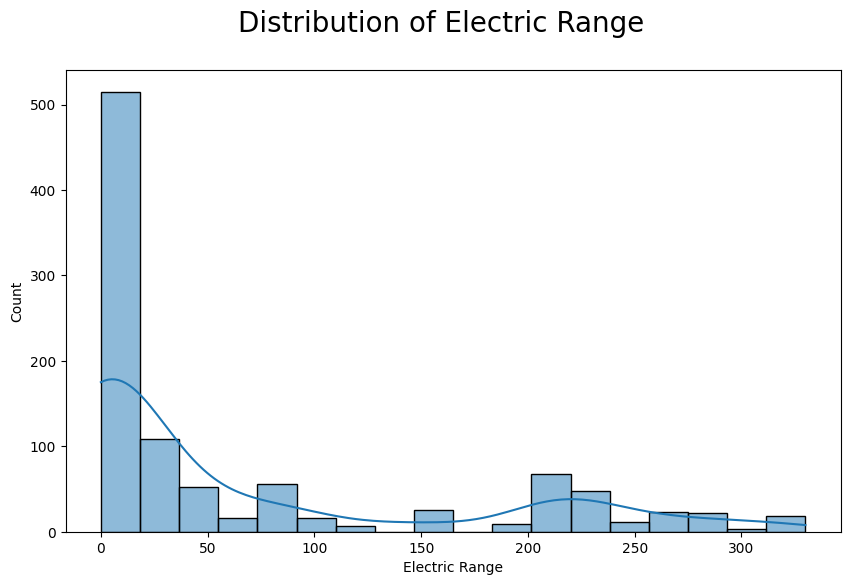

In [15]:
# Distribution of the 'Electric Range' column
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Electric Range'], kde=True)
plt.suptitle('Distribution of Electric Range',fontsize=20)

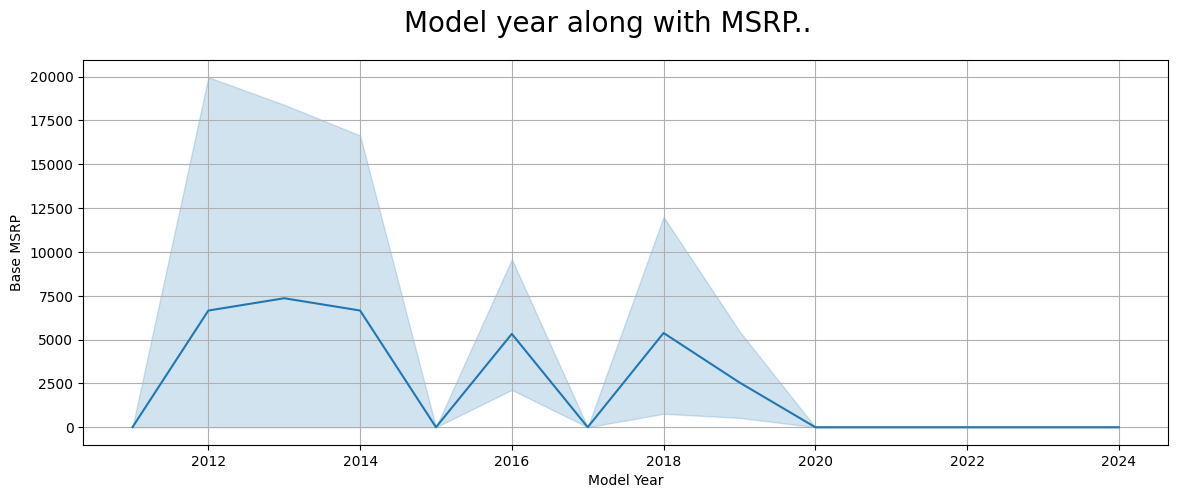

In [16]:
plt.figure(figsize=(14,5))
sns.lineplot(data=dataset,x='Model Year',y='Base MSRP')
plt.suptitle('Model year along with MSRP..',fontsize=20)
plt.grid()

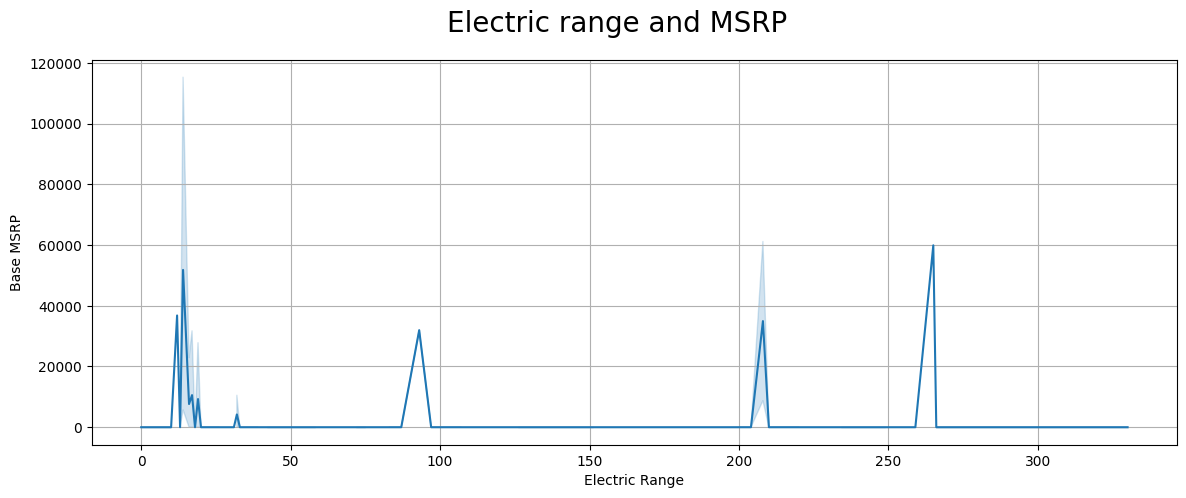

In [17]:
plt.figure(figsize=(14,5))
sns.lineplot(data=dataset,x='Electric Range',y='Base MSRP')
plt.suptitle('Electric range and MSRP',fontsize=20)
plt.grid()

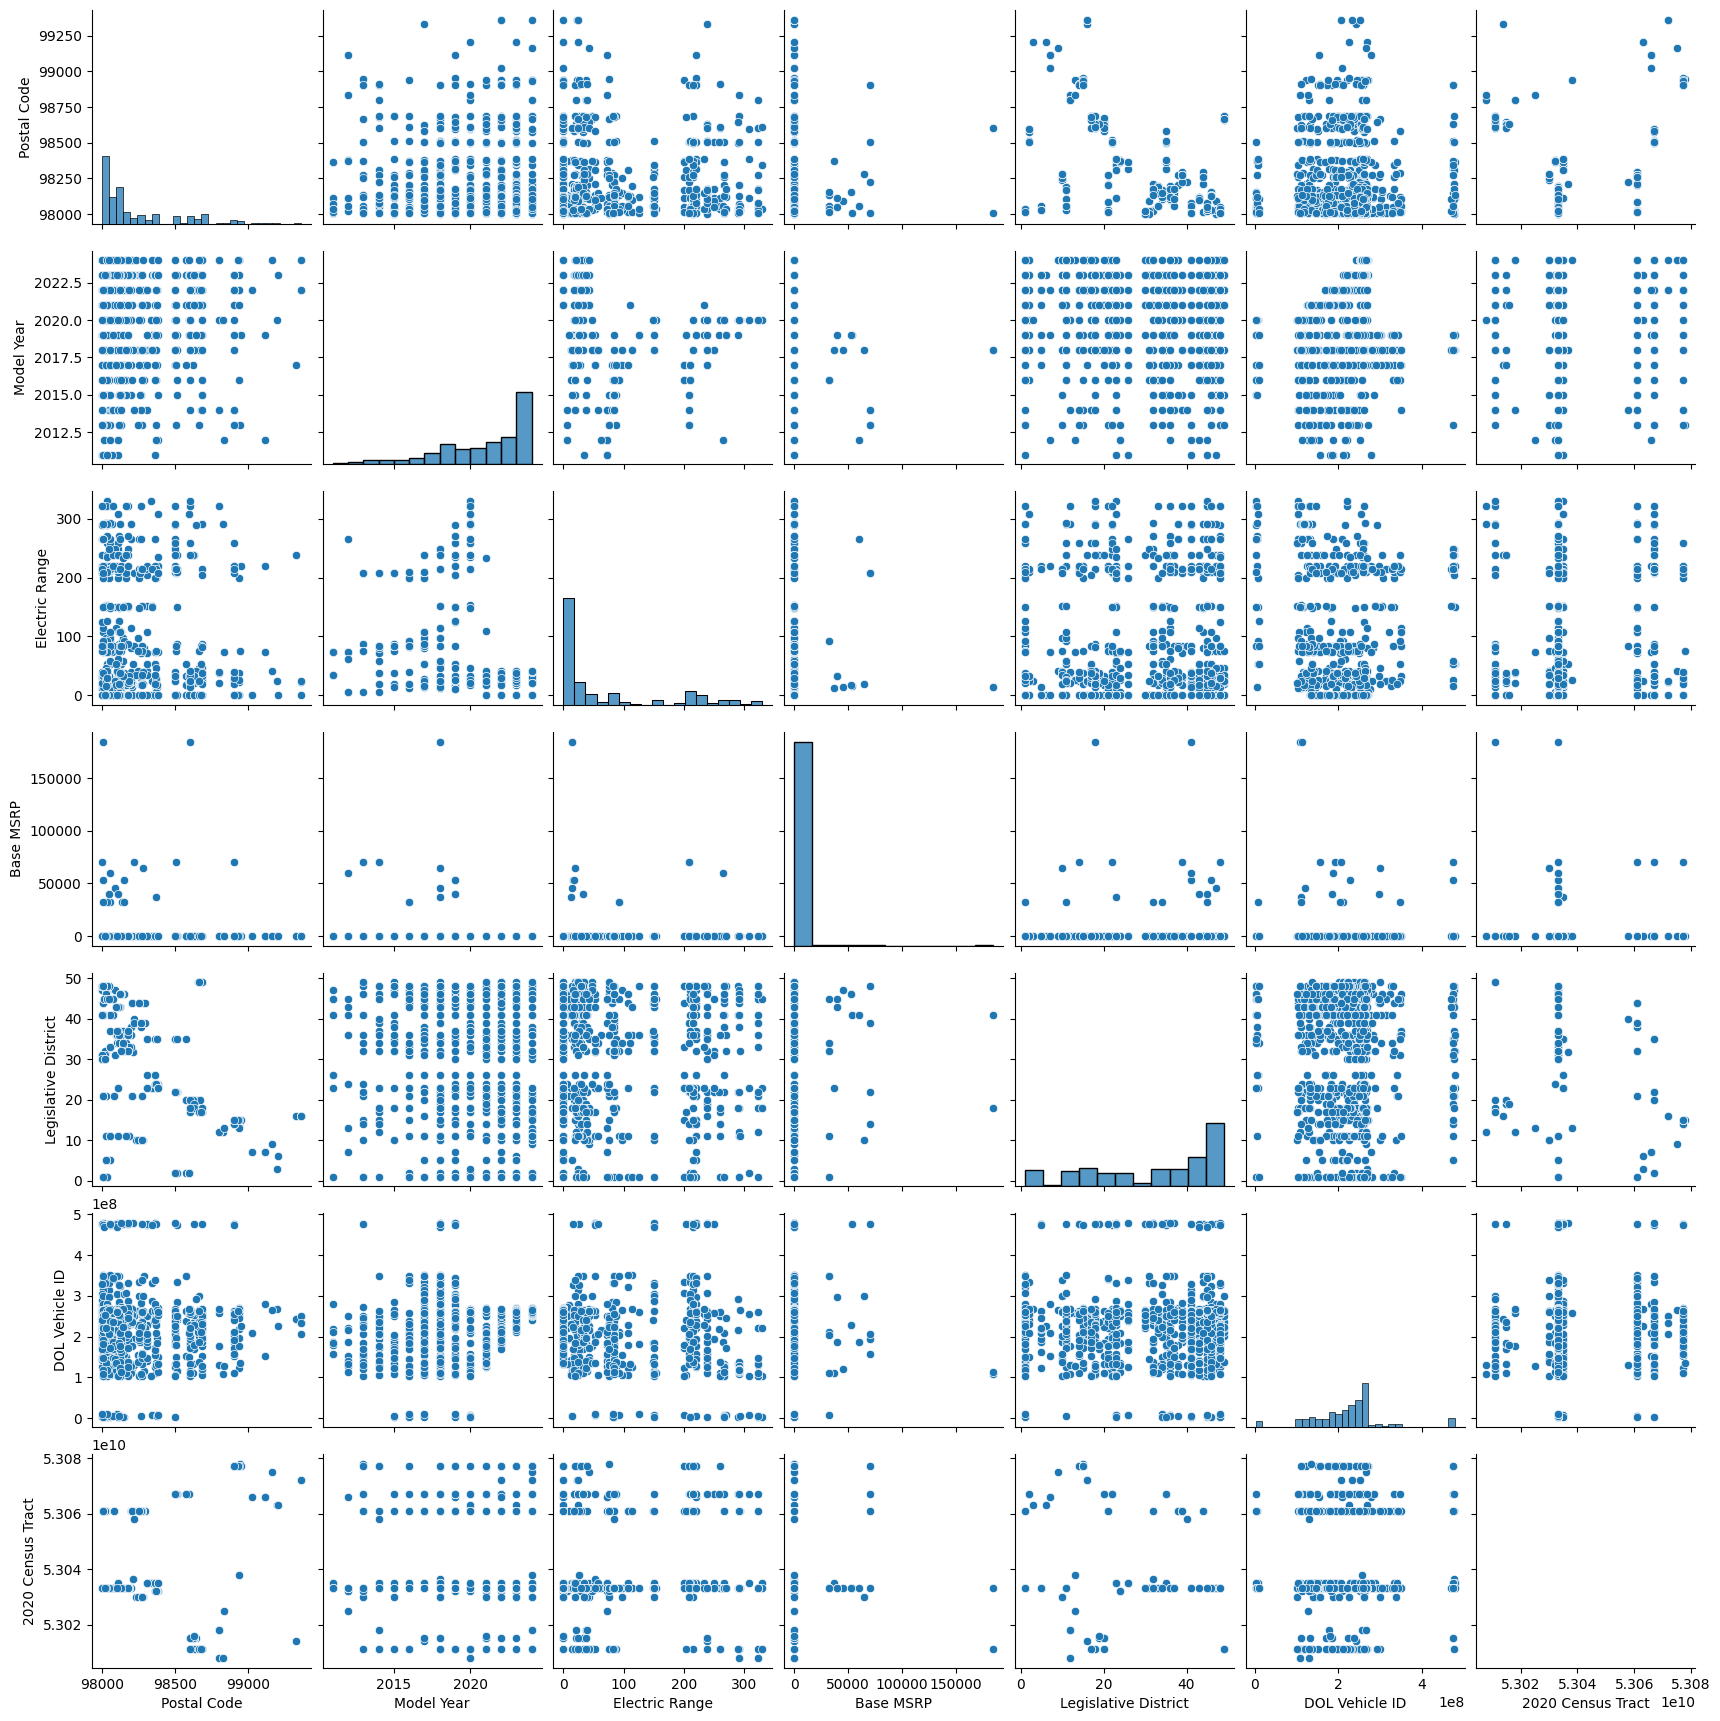

In [18]:
sns.pairplot(dataset)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5648\2352058809.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')


Text(0.5, 0.98, 'Correlation of the dataset')

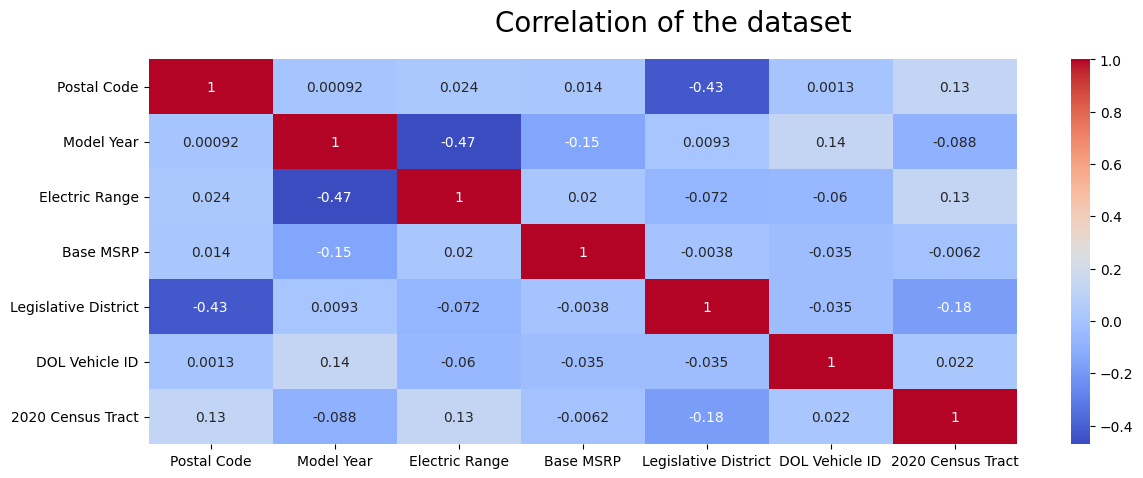

In [19]:
plt.figure(figsize=(14,5))
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')
plt.suptitle('Correlation of the dataset',fontsize=20)

# OUTLIERS

Text(0.5, 0.98, 'electric range outlier detection')

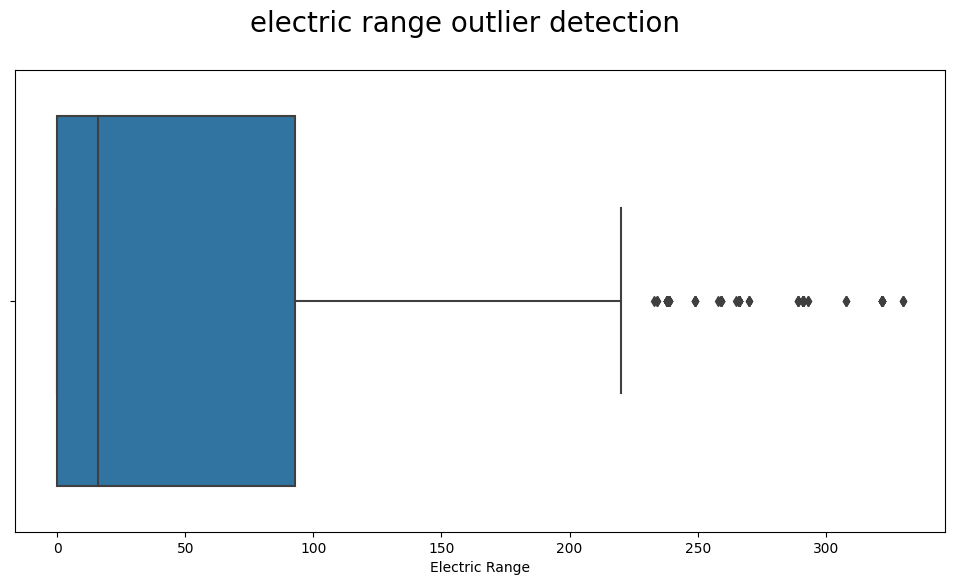

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dataset,x='Electric Range')
plt.suptitle('electric range outlier detection',fontsize=20)

Text(0.5, 0.98, 'Base MSRP outlier detection')

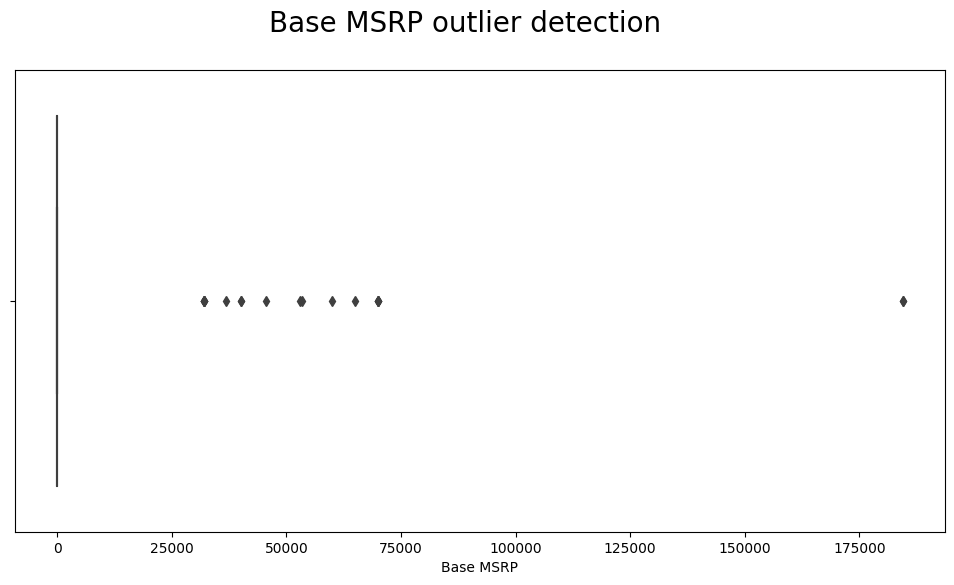

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dataset,x='Base MSRP')
plt.suptitle('Base MSRP outlier detection',fontsize=20)

In [22]:
def handle_outliers_zscore(dataset, column, z_threshold=3):
    # Calculate the Z-scores
    z_scores = np.abs(stats.zscore(dataset[column]))
    
    # Determine the replacement values for outliers
    mean_val = dataset[column].mean()
    std_val = dataset[column].std()
    
    # Create a mask for outliers
    outliers_mask = z_scores > z_threshold
    
    # Calculate the cap values
    cap_high = mean_val + z_threshold * std_val
    cap_low = mean_val - z_threshold * std_val
    
    # Replace outliers with cap values
    # Here, we ensure we're only operating on the existing DataFrame indices
    dataset[column] = np.where(outliers_mask, 
                            np.where(dataset[column] > mean_val, cap_high, cap_low), 
                            dataset[column])
    
    return dataset

In [23]:
# Apply Z-score method
dataset = handle_outliers_zscore(dataset, 'Electric Range')
dataset = handle_outliers_zscore(dataset, 'Base MSRP')

In [24]:
dataset

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4RJXN66R,Snohomish,Everett,WA,98204.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,21.0,261311557,POINT (-122.2507211 47.8976713),PUGET SOUND ENERGY INC,5.306104e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,210641315,POINT (-122.1476337 47.4438471),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EA3L,King,Seattle,WA,98125.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,46.0,124517347,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1G1RC6S5XH,Kitsap,Port Orchard,WA,98367.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,26.0,7832933,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09P,Snohomish,Monroe,WA,98272.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,39.0,235249262,POINT (-121.968385 47.854897),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,7SAYGDEE8P,King,Federal Way,WA,98023.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,30.0,253428738,POINT (-122.3581348 47.3097552),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
995,5YJ3E1EC2L,Kitsap,Bainbridge Island,WA,98110.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308.0,0.0,23.0,103460479,POINT (-122.5305071 47.6400595),PUGET SOUND ENERGY INC,5.303509e+10
996,5YJ3E1EB3K,King,Seattle,WA,98177.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,32.0,332349776,POINT (-122.3691687 47.7403542),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
997,1N4BZ0CP2G,King,Shoreline,WA,98133.0,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,32.0,113112464,POINT (-122.342434 47.736655),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10


Text(0.5, 0.98, 'electric range outlier detection')

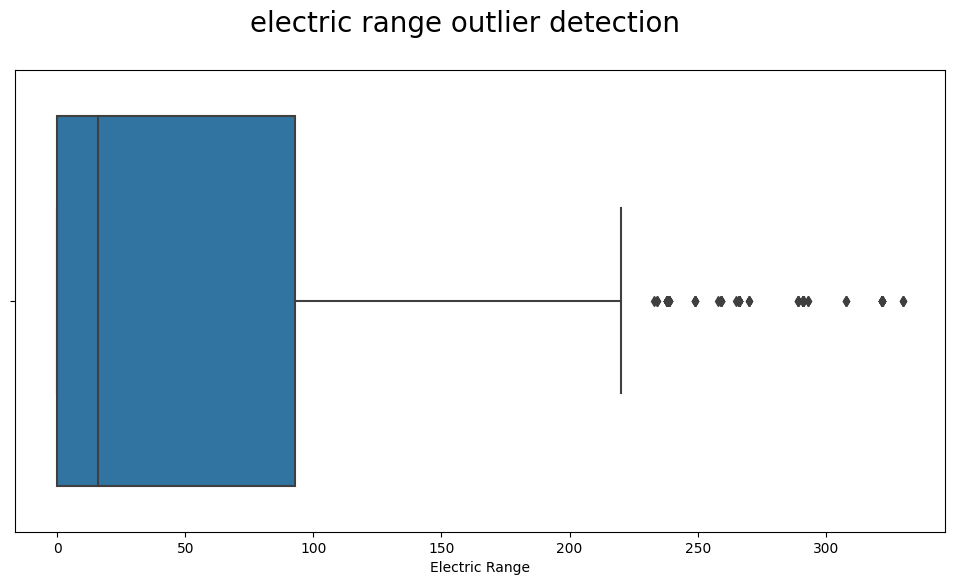

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dataset,x='Electric Range')
plt.suptitle('electric range outlier detection',fontsize=20)

Text(0.5, 0.98, 'Base MSRP outlier detection')

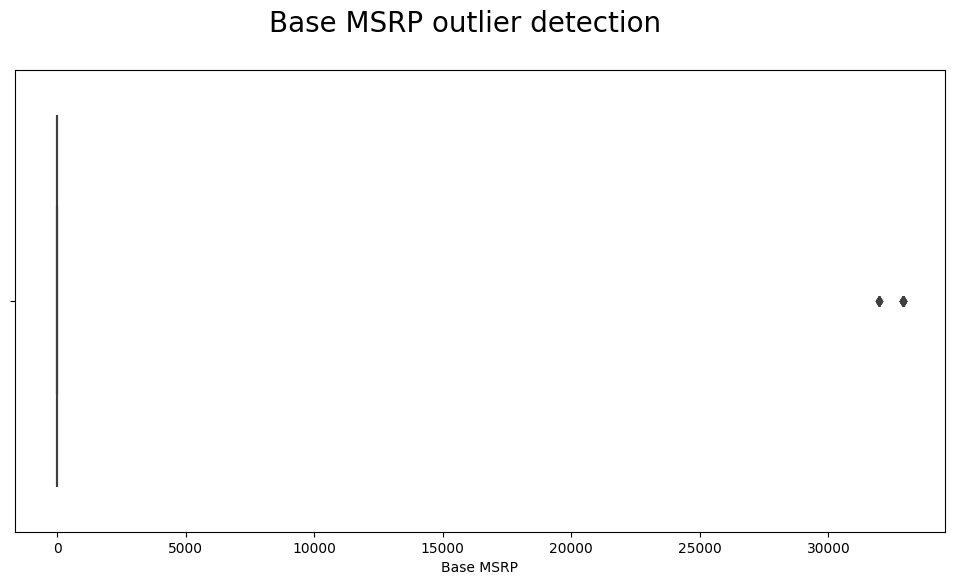

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dataset,x='Base MSRP')
plt.suptitle('Base MSRP outlier detection',fontsize=20)

# ML Prediction

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [28]:
lab=LabelEncoder()
std=StandardScaler()

In [29]:
dataset['VIN (1-10)']=lab.fit_transform(dataset['VIN (1-10)'])
dataset['County']=lab.fit_transform(dataset['County'])
dataset['City']=lab.fit_transform(dataset['City'])
dataset['State']=lab.fit_transform(dataset['State'])
dataset['Make']=lab.fit_transform(dataset['Make'])
dataset['Model']=lab.fit_transform(dataset['Model'])
dataset['Electric Vehicle Type']=lab.fit_transform(dataset['Electric Vehicle Type'])
dataset['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=lab.fit_transform(dataset['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
dataset['Vehicle Location']=lab.fit_transform(dataset['Vehicle Location'])
dataset['Electric Utility']=lab.fit_transform(dataset['Electric Utility'])

In [30]:
dataset['Postal Code']=std.fit_transform(dataset['Postal Code'].values.reshape(-1,1))
dataset['Model Year']=std.fit_transform(dataset['Model Year'].values.reshape(-1,1))
dataset['Electric Range']=std.fit_transform(dataset['Electric Range'].values.reshape(-1,1))
dataset['Base MSRP']=std.fit_transform(dataset['Base MSRP'].values.reshape(-1,1))
dataset['Legislative District']=std.fit_transform(dataset['Legislative District'].values.reshape(-1,1))
dataset['DOL Vehicle ID']=std.fit_transform(dataset['DOL Vehicle ID'].values.reshape(-1,1))
dataset['2020 Census Tract']=std.fit_transform(dataset['2020 Census Tract'].values.reshape(-1,1))

In [31]:
x = dataset.drop(columns=['2020 Census Tract'])
y = dataset['2020 Census Tract']

# **Splitting the dataset**

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# **Importing the machine learning model and fitting the dataset**

In [34]:
#Importing the machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [35]:
model_1=LinearRegression()

In [36]:
model_1.fit(x_train,y_train)

LinearRegression()

In [37]:
model_1.score(x_train,y_train)

0.948607681013934

In [38]:
y_pred_1=model_1.predict(x_test)

In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,median_absolute_error

In [40]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_1))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_1))
print('R2_score',r2_score(y_test,y_pred_1))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_1))

Mean_Squared_error 0.04778881974871471
Mean_Absolute_error 0.15274876291564096
R2_score 0.951029631018844
Median_absolute_error 0.08837288449543276


In [41]:
model_2=DecisionTreeRegressor()

In [42]:
model_2.fit(x_train,y_train)

DecisionTreeRegressor()

In [43]:
model_2.score(x_train,y_train)

1.0

In [44]:
y_pred_2=model_2.predict(x_test)

In [45]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_2))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_2))
print('R2_score',r2_score(y_test,y_pred_2))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_2))

Mean_Squared_error 0.000271389875718454
Mean_Absolute_error 0.001713222817252077
R2_score 0.9997219001762009
Median_absolute_error 1.277970352513147e-05


In [46]:
model_3=SVR()

In [47]:
model_3.fit(x_train,y_train)

SVR()

In [48]:
model_3.score(x_train,y_train)

0.06282453413087863

In [49]:
y_pred_3=model_3.predict(x_test)

In [50]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_3))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_3))
print('R2_score',r2_score(y_test,y_pred_3))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_3))

Mean_Squared_error 0.9233509350275104
Mean_Absolute_error 0.5242222460734846
R2_score 0.053819779916018495
Median_absolute_error 0.09507713627392494


In [51]:
model_4=RandomForestRegressor()

In [52]:
model_4.fit(x_train,y_train)

RandomForestRegressor()

In [53]:
model_4.score(x_train,y_train)

0.9997024873502799

In [54]:
y_pred_4=model_4.predict(x_test)

In [55]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_4))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_4))
print('R2_score',r2_score(y_test,y_pred_4))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_4))

Mean_Squared_error 0.00042622792660676305
Mean_Absolute_error 0.00364562975564227
R2_score 0.9995632338495539
Median_absolute_error 2.568938435044965e-05


In [56]:
model_5=KNeighborsRegressor()

In [57]:
model_5.fit(x_train,y_train)

KNeighborsRegressor()

In [58]:
model_5.score(x_train,y_train)

0.5053869743489992

In [59]:
y_pred_5=model_5.predict(x_test)

In [60]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_5))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_5))
print('R2_score',r2_score(y_test,y_pred_5))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_5))

Mean_Squared_error 0.8175882207385513
Mean_Absolute_error 0.5830651209294323
R2_score 0.16219741239182806
Median_absolute_error 0.37584072274288455


In [61]:
model_6=GradientBoostingRegressor()

In [62]:
model_6.fit(x_train,y_train)

GradientBoostingRegressor()

In [63]:
model_6.score(x_train,y_train)

0.9999999383205357

In [64]:
y_pred_6=model_6.predict(x_test)

In [65]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_6))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_6))
print('R2_score',r2_score(y_test,y_pred_6))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_6))

Mean_Squared_error 0.0006066501111723322
Mean_Absolute_error 0.003607875337804128
R2_score 0.9993783508372297
Median_absolute_error 0.00014841892133306278


In [66]:
model_7=XGBRegressor()

In [67]:
model_7.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [68]:
model_7.score(x_train,y_train)

0.9999999608002261

In [69]:
y_pred_7=model_7.predict(x_test)

In [70]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_7))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_7))
print('R2_score',r2_score(y_test,y_pred_7))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_7))

Mean_Squared_error 0.00027126957202396236
Mean_Absolute_error 0.0018219478774934746
R2_score 0.9997220234543305
Median_absolute_error 0.00013284966903048812


# **Visualizing the training performance**

In [71]:
#Let's enter the model name and the performance detail's
model_name=['Linear_regression','Decision_tree_Regressor','SVR','Random_forest_Regressor','KNN','Gradient_boost','XGBoost']
model_train_performance=[model_1.score(x_train,y_train),model_2.score(x_train,y_train),model_3.score(x_train,y_train),model_4.score(x_train,y_train),model_5.score(x_train,y_train),model_6.score(x_train,y_train),model_7.score(x_train,y_train)]

In [77]:
print('The Training score of Linear Regression is:',model_1.score(x_train,y_train))
print('The Training score of Decision Tree is:',model_2.score(x_train,y_train))
print('The Training score of SVM is:',model_3.score(x_train,y_train))
print('The Training score of Random Forest is:',model_4.score(x_train,y_train))
print('The Training score of KNN is:',model_5.score(x_train,y_train))
print('The Training score of GradientBoost is:',model_6.score(x_train,y_train))
print('The Training score of XGBoost is:',model_7.score(x_train,y_train))

The Training score of Linear Regression is: 0.948607681013934
The Training score of Decision Tree is: 1.0
The Training score of SVM is: 0.06282453413087863
The Training score of Random Forest is: 0.9997024873502799
The Training score of KNN is: 0.5053869743489992
The Training score of GradientBoost is: 0.9999999383205357
The Training score of XGBoost is: 0.9999999608002261


Text(0.5, 0.98, 'Training Score Of Each Model')

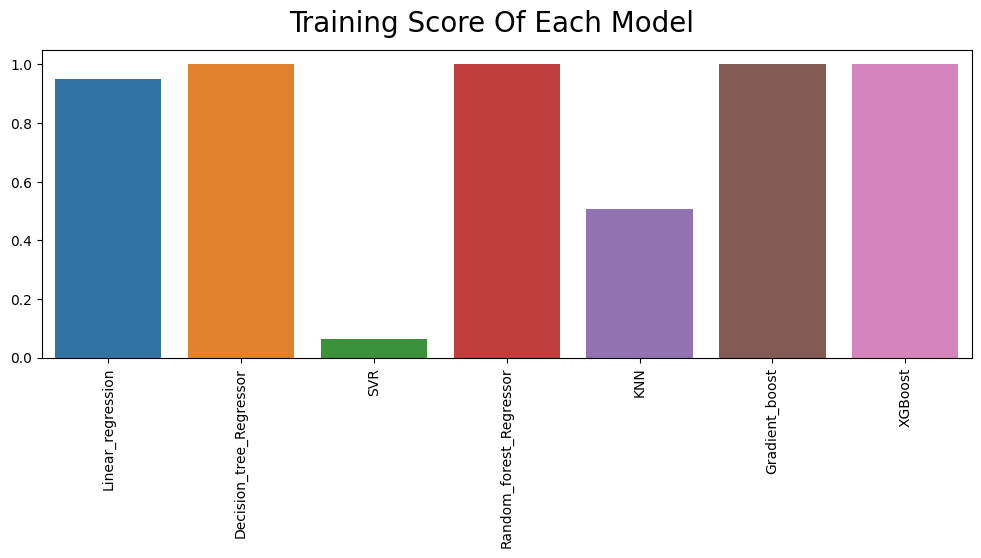

In [78]:
plt.figure(figsize=(12,4))
sns.barplot(x=model_name,y=model_train_performance)
plt.xticks(rotation=90)
plt.suptitle('Training Score Of Each Model',fontsize=20)

# **Testing performance of each model**

In [79]:
model_test_performance=[r2_score(y_test,y_pred_1),r2_score(y_test,y_pred_2),r2_score(y_test,y_pred_3),r2_score(y_test,y_pred_4),r2_score(y_test,y_pred_5),r2_score(y_test,y_pred_6),r2_score(y_test,y_pred_7)]

In [80]:
print('The Testing score of Linear Regression is:',r2_score(y_test,y_pred_1))
print('The Testing score of Decision Tree is:',r2_score(y_test,y_pred_2))
print('The Testing score of SVM is:',r2_score(y_test,y_pred_3))
print('The Testing score of Random Forest is:',r2_score(y_test,y_pred_4))
print('The Testing score of KNN is:',r2_score(y_test,y_pred_5))
print('The Testing score of GradientBoost is:',r2_score(y_test,y_pred_6))
print('The Testing score of XGBoost is:',r2_score(y_test,y_pred_7))

The Testing score of Linear Regression is: 0.951029631018844
The Testing score of Decision Tree is: 0.9997219001762009
The Testing score of SVM is: 0.053819779916018495
The Testing score of Random Forest is: 0.9995632338495539
The Testing score of KNN is: 0.16219741239182806
The Testing score of GradientBoost is: 0.9993783508372297
The Testing score of XGBoost is: 0.9997220234543305


Text(0.5, 0.98, 'Testing Score Of Each Model')

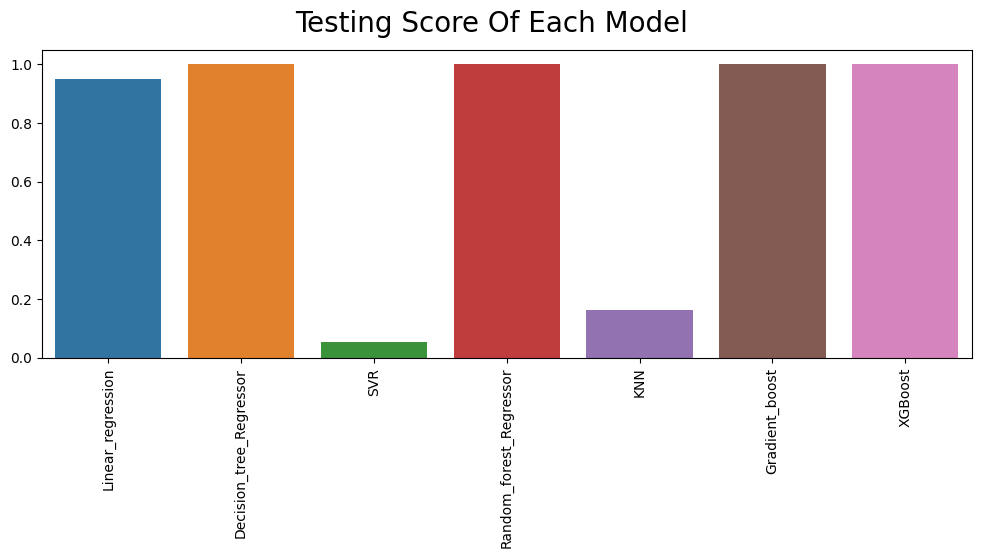

In [76]:
plt.figure(figsize=(12,4))
sns.barplot(x=model_name,y=model_test_performance)
plt.xticks(rotation=90)
plt.suptitle('Testing Score Of Each Model',fontsize=20)